## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   6.884267  1260.884210  0.932361  4.249982  1.436713
1  68.685047   634.551947  0.578695  6.568867  1.343279
2  45.603080  1728.505736  0.504792  3.119681  1.500388
3  51.975477  1120.378433  0.295629  4.118238  1.536079
4  15.856591   956.820763  0.510644  4.914954  1.548638


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0238963	total: 61.6ms	remaining: 1m 1s
1:	learn: 1.0158885	total: 62.8ms	remaining: 31.3s
2:	learn: 1.0080116	total: 63.3ms	remaining: 21s
3:	learn: 1.0000421	total: 63.9ms	remaining: 15.9s
4:	learn: 0.9908174	total: 64.4ms	remaining: 12.8s
5:	learn: 0.9818947	total: 64.9ms	remaining: 10.7s
6:	learn: 0.9714265	total: 65.4ms	remaining: 9.28s
7:	learn: 0.9612526	total: 66ms	remaining: 8.18s


8:	learn: 0.9506103	total: 67.4ms	remaining: 7.42s
9:	learn: 0.9411011	total: 69.2ms	remaining: 6.86s
10:	learn: 0.9345279	total: 70ms	remaining: 6.3s
11:	learn: 0.9225919	total: 70.9ms	remaining: 5.84s
12:	learn: 0.9148431	total: 71.5ms	remaining: 5.43s
13:	learn: 0.9063103	total: 72.2ms	remaining: 5.08s
14:	learn: 0.8980910	total: 73ms	remaining: 4.79s
15:	learn: 0.8902979	total: 73.5ms	remaining: 4.52s
16:	learn: 0.8813454	total: 74ms	remaining: 4.28s
17:	learn: 0.8735253	total: 74.7ms	remaining: 4.07s
18:	learn: 0.8664649	total: 75.2ms	remaining: 3.88s
19:	learn: 0.8555152	total: 75.8ms	remaining: 3.71s
20:	learn: 0.8473526	total: 76.5ms	remaining: 3.57s
21:	learn: 0.8395694	total: 77ms	remaining: 3.42s
22:	learn: 0.8317089	total: 77.6ms	remaining: 3.3s
23:	learn: 0.8238013	total: 78.1ms	remaining: 3.17s
24:	learn: 0.8154438	total: 78.9ms	remaining: 3.08s
25:	learn: 0.8085904	total: 79.5ms	remaining: 2.98s
26:	learn: 0.8031628	total: 80.1ms	remaining: 2.89s
27:	learn: 0.7966646	tot

225:	learn: 0.2263967	total: 167ms	remaining: 570ms
226:	learn: 0.2253924	total: 167ms	remaining: 569ms
227:	learn: 0.2247413	total: 167ms	remaining: 567ms
228:	learn: 0.2238626	total: 168ms	remaining: 566ms
229:	learn: 0.2228382	total: 168ms	remaining: 564ms
230:	learn: 0.2221727	total: 169ms	remaining: 562ms
231:	learn: 0.2214824	total: 169ms	remaining: 560ms
232:	learn: 0.2203105	total: 170ms	remaining: 559ms
233:	learn: 0.2188552	total: 170ms	remaining: 557ms
234:	learn: 0.2177942	total: 171ms	remaining: 556ms
235:	learn: 0.2170879	total: 171ms	remaining: 554ms
236:	learn: 0.2162580	total: 171ms	remaining: 552ms
237:	learn: 0.2155181	total: 172ms	remaining: 550ms
238:	learn: 0.2144283	total: 172ms	remaining: 549ms
239:	learn: 0.2135435	total: 173ms	remaining: 547ms
240:	learn: 0.2129337	total: 173ms	remaining: 544ms
241:	learn: 0.2121099	total: 173ms	remaining: 543ms
242:	learn: 0.2112135	total: 174ms	remaining: 541ms
243:	learn: 0.2105679	total: 174ms	remaining: 540ms
244:	learn: 

341:	learn: 0.1459518	total: 220ms	remaining: 424ms
342:	learn: 0.1455722	total: 221ms	remaining: 423ms
343:	learn: 0.1452003	total: 221ms	remaining: 422ms
344:	learn: 0.1443599	total: 222ms	remaining: 421ms
345:	learn: 0.1441421	total: 222ms	remaining: 420ms
346:	learn: 0.1435652	total: 223ms	remaining: 419ms
347:	learn: 0.1432072	total: 223ms	remaining: 418ms
348:	learn: 0.1429662	total: 223ms	remaining: 417ms
349:	learn: 0.1421250	total: 224ms	remaining: 415ms
350:	learn: 0.1413061	total: 224ms	remaining: 414ms
351:	learn: 0.1405445	total: 224ms	remaining: 413ms
352:	learn: 0.1397503	total: 225ms	remaining: 412ms
353:	learn: 0.1389753	total: 225ms	remaining: 411ms
354:	learn: 0.1382697	total: 226ms	remaining: 410ms
355:	learn: 0.1374239	total: 226ms	remaining: 409ms
356:	learn: 0.1365993	total: 226ms	remaining: 408ms
357:	learn: 0.1358770	total: 227ms	remaining: 406ms
358:	learn: 0.1352183	total: 227ms	remaining: 405ms
359:	learn: 0.1344294	total: 227ms	remaining: 404ms
360:	learn: 

512:	learn: 0.0765770	total: 312ms	remaining: 296ms
513:	learn: 0.0763426	total: 313ms	remaining: 296ms
514:	learn: 0.0761280	total: 313ms	remaining: 295ms
515:	learn: 0.0759245	total: 314ms	remaining: 294ms
516:	learn: 0.0755566	total: 314ms	remaining: 294ms
517:	learn: 0.0752543	total: 315ms	remaining: 293ms
518:	learn: 0.0749606	total: 315ms	remaining: 292ms
519:	learn: 0.0748008	total: 316ms	remaining: 292ms
520:	learn: 0.0745738	total: 316ms	remaining: 291ms
521:	learn: 0.0743523	total: 317ms	remaining: 290ms
522:	learn: 0.0741748	total: 317ms	remaining: 289ms
523:	learn: 0.0739950	total: 318ms	remaining: 288ms
524:	learn: 0.0738204	total: 318ms	remaining: 288ms
525:	learn: 0.0735070	total: 318ms	remaining: 287ms
526:	learn: 0.0732923	total: 319ms	remaining: 286ms
527:	learn: 0.0731404	total: 319ms	remaining: 285ms
528:	learn: 0.0729322	total: 320ms	remaining: 285ms
529:	learn: 0.0727651	total: 320ms	remaining: 284ms
530:	learn: 0.0723975	total: 320ms	remaining: 283ms
531:	learn: 

653:	learn: 0.0499706	total: 373ms	remaining: 197ms
654:	learn: 0.0497433	total: 374ms	remaining: 197ms
655:	learn: 0.0495097	total: 374ms	remaining: 196ms
656:	learn: 0.0494190	total: 375ms	remaining: 196ms
657:	learn: 0.0492176	total: 375ms	remaining: 195ms
658:	learn: 0.0489755	total: 376ms	remaining: 194ms
659:	learn: 0.0487973	total: 376ms	remaining: 194ms
660:	learn: 0.0486554	total: 377ms	remaining: 193ms
661:	learn: 0.0484289	total: 377ms	remaining: 192ms
662:	learn: 0.0483417	total: 377ms	remaining: 192ms
663:	learn: 0.0482528	total: 378ms	remaining: 191ms
664:	learn: 0.0481569	total: 378ms	remaining: 191ms
665:	learn: 0.0479365	total: 379ms	remaining: 190ms
666:	learn: 0.0478489	total: 379ms	remaining: 189ms
667:	learn: 0.0477625	total: 379ms	remaining: 189ms
668:	learn: 0.0476737	total: 380ms	remaining: 188ms
669:	learn: 0.0474803	total: 380ms	remaining: 187ms
670:	learn: 0.0473940	total: 380ms	remaining: 187ms
671:	learn: 0.0472050	total: 381ms	remaining: 186ms
672:	learn: 

872:	learn: 0.0282129	total: 475ms	remaining: 69.1ms
873:	learn: 0.0280626	total: 475ms	remaining: 68.5ms
874:	learn: 0.0279993	total: 476ms	remaining: 68.1ms
875:	learn: 0.0278624	total: 477ms	remaining: 67.5ms
876:	learn: 0.0278045	total: 477ms	remaining: 67ms
877:	learn: 0.0276453	total: 478ms	remaining: 66.4ms
878:	learn: 0.0275444	total: 478ms	remaining: 65.9ms
879:	learn: 0.0274878	total: 479ms	remaining: 65.3ms
880:	learn: 0.0274500	total: 479ms	remaining: 64.7ms
881:	learn: 0.0273170	total: 480ms	remaining: 64.2ms
882:	learn: 0.0272611	total: 480ms	remaining: 63.6ms
883:	learn: 0.0272061	total: 481ms	remaining: 63.1ms
884:	learn: 0.0271694	total: 481ms	remaining: 62.5ms
885:	learn: 0.0270365	total: 481ms	remaining: 61.9ms
886:	learn: 0.0269822	total: 482ms	remaining: 61.4ms
887:	learn: 0.0269055	total: 482ms	remaining: 60.8ms
888:	learn: 0.0268697	total: 483ms	remaining: 60.3ms
889:	learn: 0.0268162	total: 483ms	remaining: 59.7ms
890:	learn: 0.0267802	total: 484ms	remaining: 59

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.42021603445468025


ABC Pre-generator MAE 0.42021603445468025


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

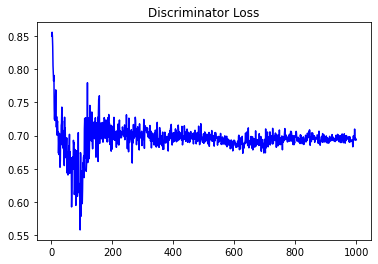

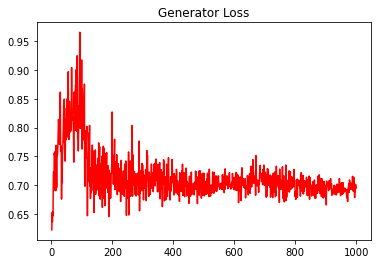

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6563931738957762


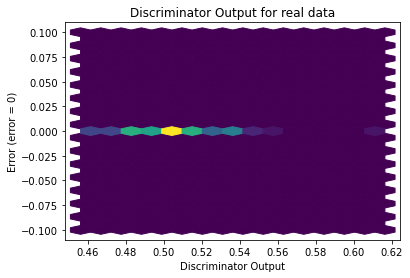

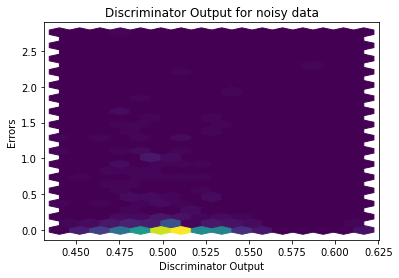

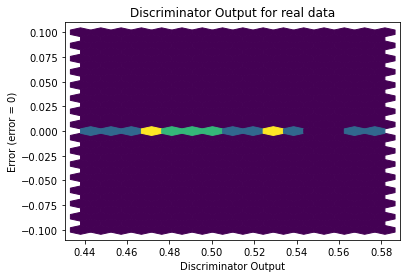

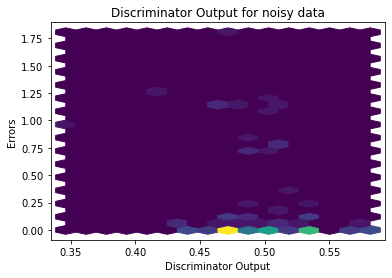

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

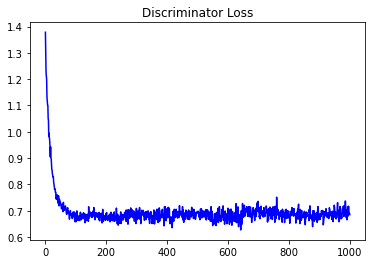

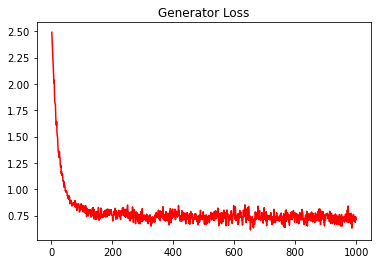

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.8044088112190366


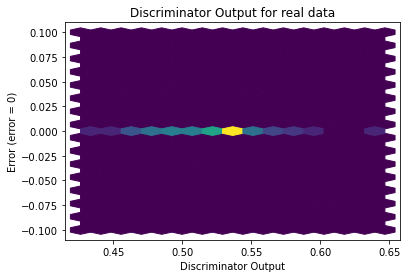

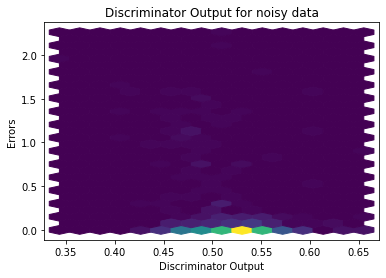

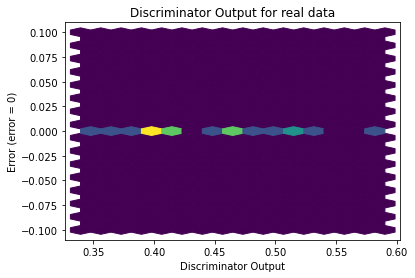

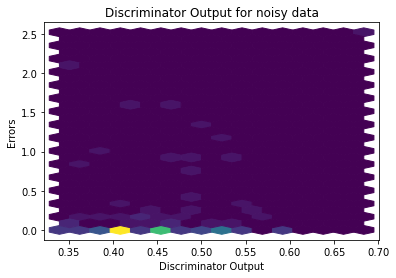

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


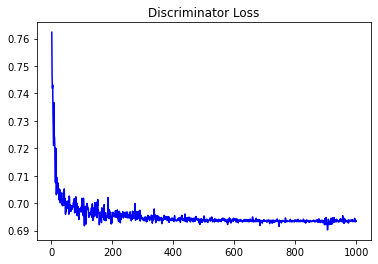

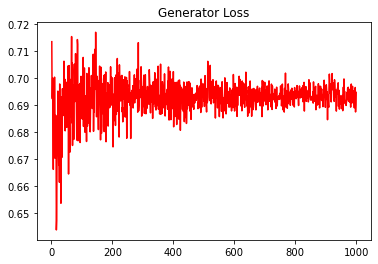

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5728944942355156


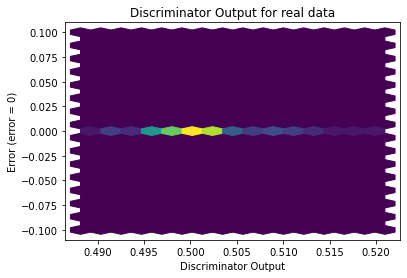

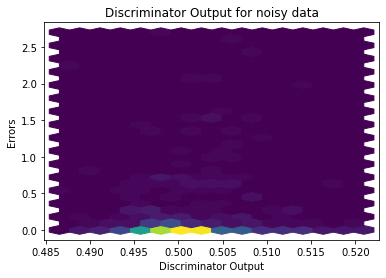

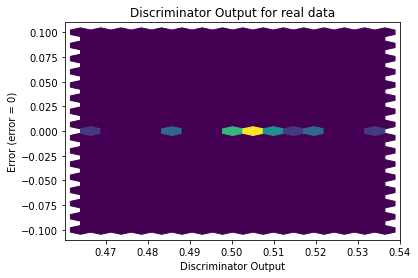

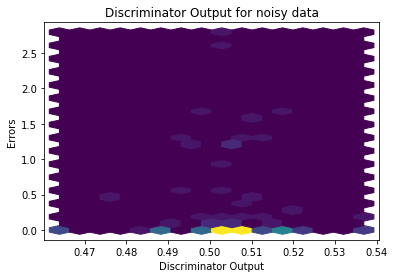

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


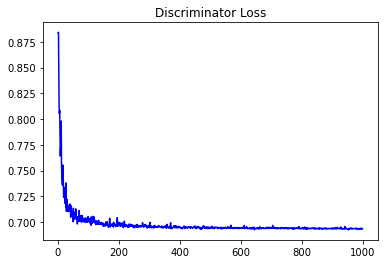

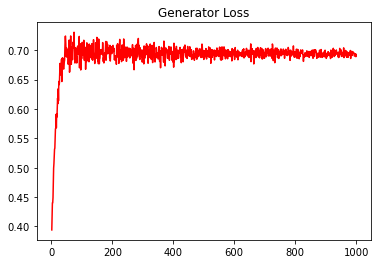

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.41687113102525475


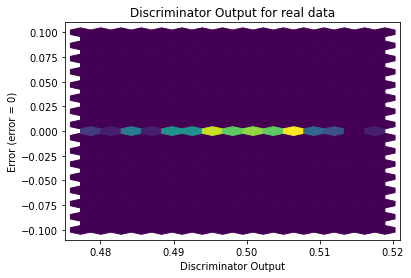

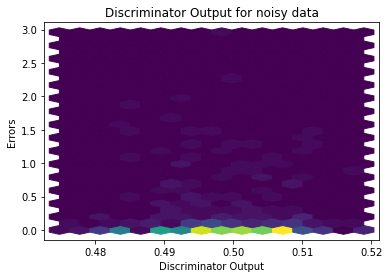

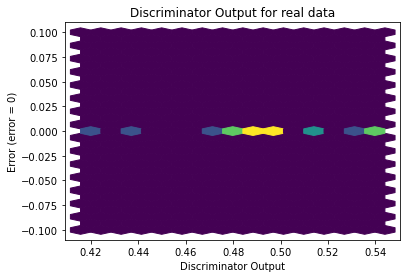

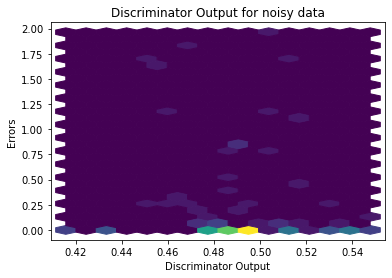

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7615]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0326]], requires_grad=True)
